In [1]:
from geopolrisk.assessment.main import gprs_calc
from geopolrisk.assessment.utils import regions
from geopolrisk.assessment.database import Database

In [2]:
db = Database()
db.initialize()

Attempting to connect to database: c:\users\hahnme_a\pycharmprojects\geopolrisk-py\geopolrisk\lib\world_mining_data.db



eading table/s ['Aluminium', 'Antimony', 'Arsenic', 'Asbestos', 'Baryte', 'Bauxite', 'Bentonite', 'Beryllium (conc.)', 'Bismuth', 'Boron Minerals', 'Cadmium', 'Chromium (Cr2O3)', 'Cobalt', 'Coking Coal', 'Copper', 'Diamonds (Gem)', 'Di

Attempting to connect to database: c:\users\hahnme_a\pycharmprojects\geopolrisk-py\geopolrisk\lib\wgi.db



eading table/s ['Normalized'] from the library database c:\users\hahnme_a\pycharmprojects\geopolrisk-py\geopolrisk\lib\wgi.db.: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 335.79it/s]

Attempting to connect to database: c:\users\hahnme_a\pycharmprojects\geopolrisk-py\geopolrisk\lib\baci.db



eading table/s ['baci_trade'] from the library database c:\users\hahnme_a\pycharmprojects\geopolrisk-py\geopolrisk\lib\baci.db.: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:15<00:00, 15.91s/it]

In [3]:
# db.regional = True
# print(db.regional)

In [4]:
ListofMetals = [
    260600,  # Aluminium
    261710,  # Antimony
    280480,  # Arsenic
    252400,  # Asbestos
    251110,  # Baryte
    280450,  # Boron
    810710,  # Cadmium
    261000,  # Chromium
    270111,  # Coal
    282200,  # Cobalt
    260300,  # Copper
    270900,  # Crude oil
    252910,  # Feldspar
    252922,  # Fluorspar
    811291,  # Gallium
    282560,  # Germanium
    710811,  # Gold
    250410,  # Graphite
    252010,  # Gypsum
    811291,  # Indium
    260111,  # Iron
    260700,  # Lead
    270112,  # Lignite
    283691,  # Lithium
    251910,  # Magnesium
    260200,  # Manganese
    280540,  # Mercury
    261310,  # Molybdenum
    271111,  # Natural gas
    260400,  # Nickel
    261590,  # Niobium
    711021,  # Palladium
    711011,  # Platinum
    284690,  # Rare earth
    811291,  # Rhenium
    711031,  # Rhodium
    280490,  # Selenium
    261610,  # Silver
    260900,  # Tin
    261400,  # Titanium
    261100,  # Tungsten
    261210,  # Uranium
    261590,  # Vanadium
    260800,  # Zinc
    261510,  # Zirconium
]

ListofYear = [2018, 2019, 2020, 2021, 2022]

ListofCountries = [
    # 757, # Switzerland
    "EU",
]

In [5]:
# # Extract all country codes from the 'Country_ISO' table
# try:
#     country_table = db.production["Country_ISO"] 
#     ListofCountries = country_table["ISO"].tolist()
# except KeyError:
#     raise KeyError("Country_ISO table not found in db.production.")
# except Exception as e:
#     raise RuntimeError(f"Error extracting country codes: {e}")

In [6]:
try:
    gprs_calc(period=ListofYear, country=ListofCountries, resource=ListofMetals, db=db)
    print("GeoPolRisk calculation completed successfully.")
except Exception as e:
    print(f"Error running GeoPolRisk calculation: {e}")

Error running GeoPolRisk calculation: Country 'EU' cannot be converted to Name.


# Visualization

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Define the file path
file_path = r'output\results.xlsx'
# Load the Excel file into a DataFrame
df = pd.read_excel(file_path)
# Display the first few rows of the data
df.head()


,DBID,Country [Economic Entity],Raw Material,Year,GeoPolRisk Score,GeoPolRisk Characterization Factor [eq. Kg-Cu/Kg],HHI,Import Risk,Price
0,2606007572018,Switzerland,Aluminium,2018,0.167347,0.058520,0.339713,0.492612,0.349692
1,2617107572018,Switzerland,Antimony,2018,0.180443,25.622945,0.322377,0.559728,142.000000
2,2804807572018,Switzerland,Arsenic,2018,0.162870,9.577226,0.382410,0.425904,58.802923
3,2524007572018,Switzerland,Asbestos,2018,0.251105,0.149606,0.424203,0.591945,0.595791
4,2511107572018,Switzerland,Baryte,2018,0.067567,0.033112,0.181539,0.372188,0.490060


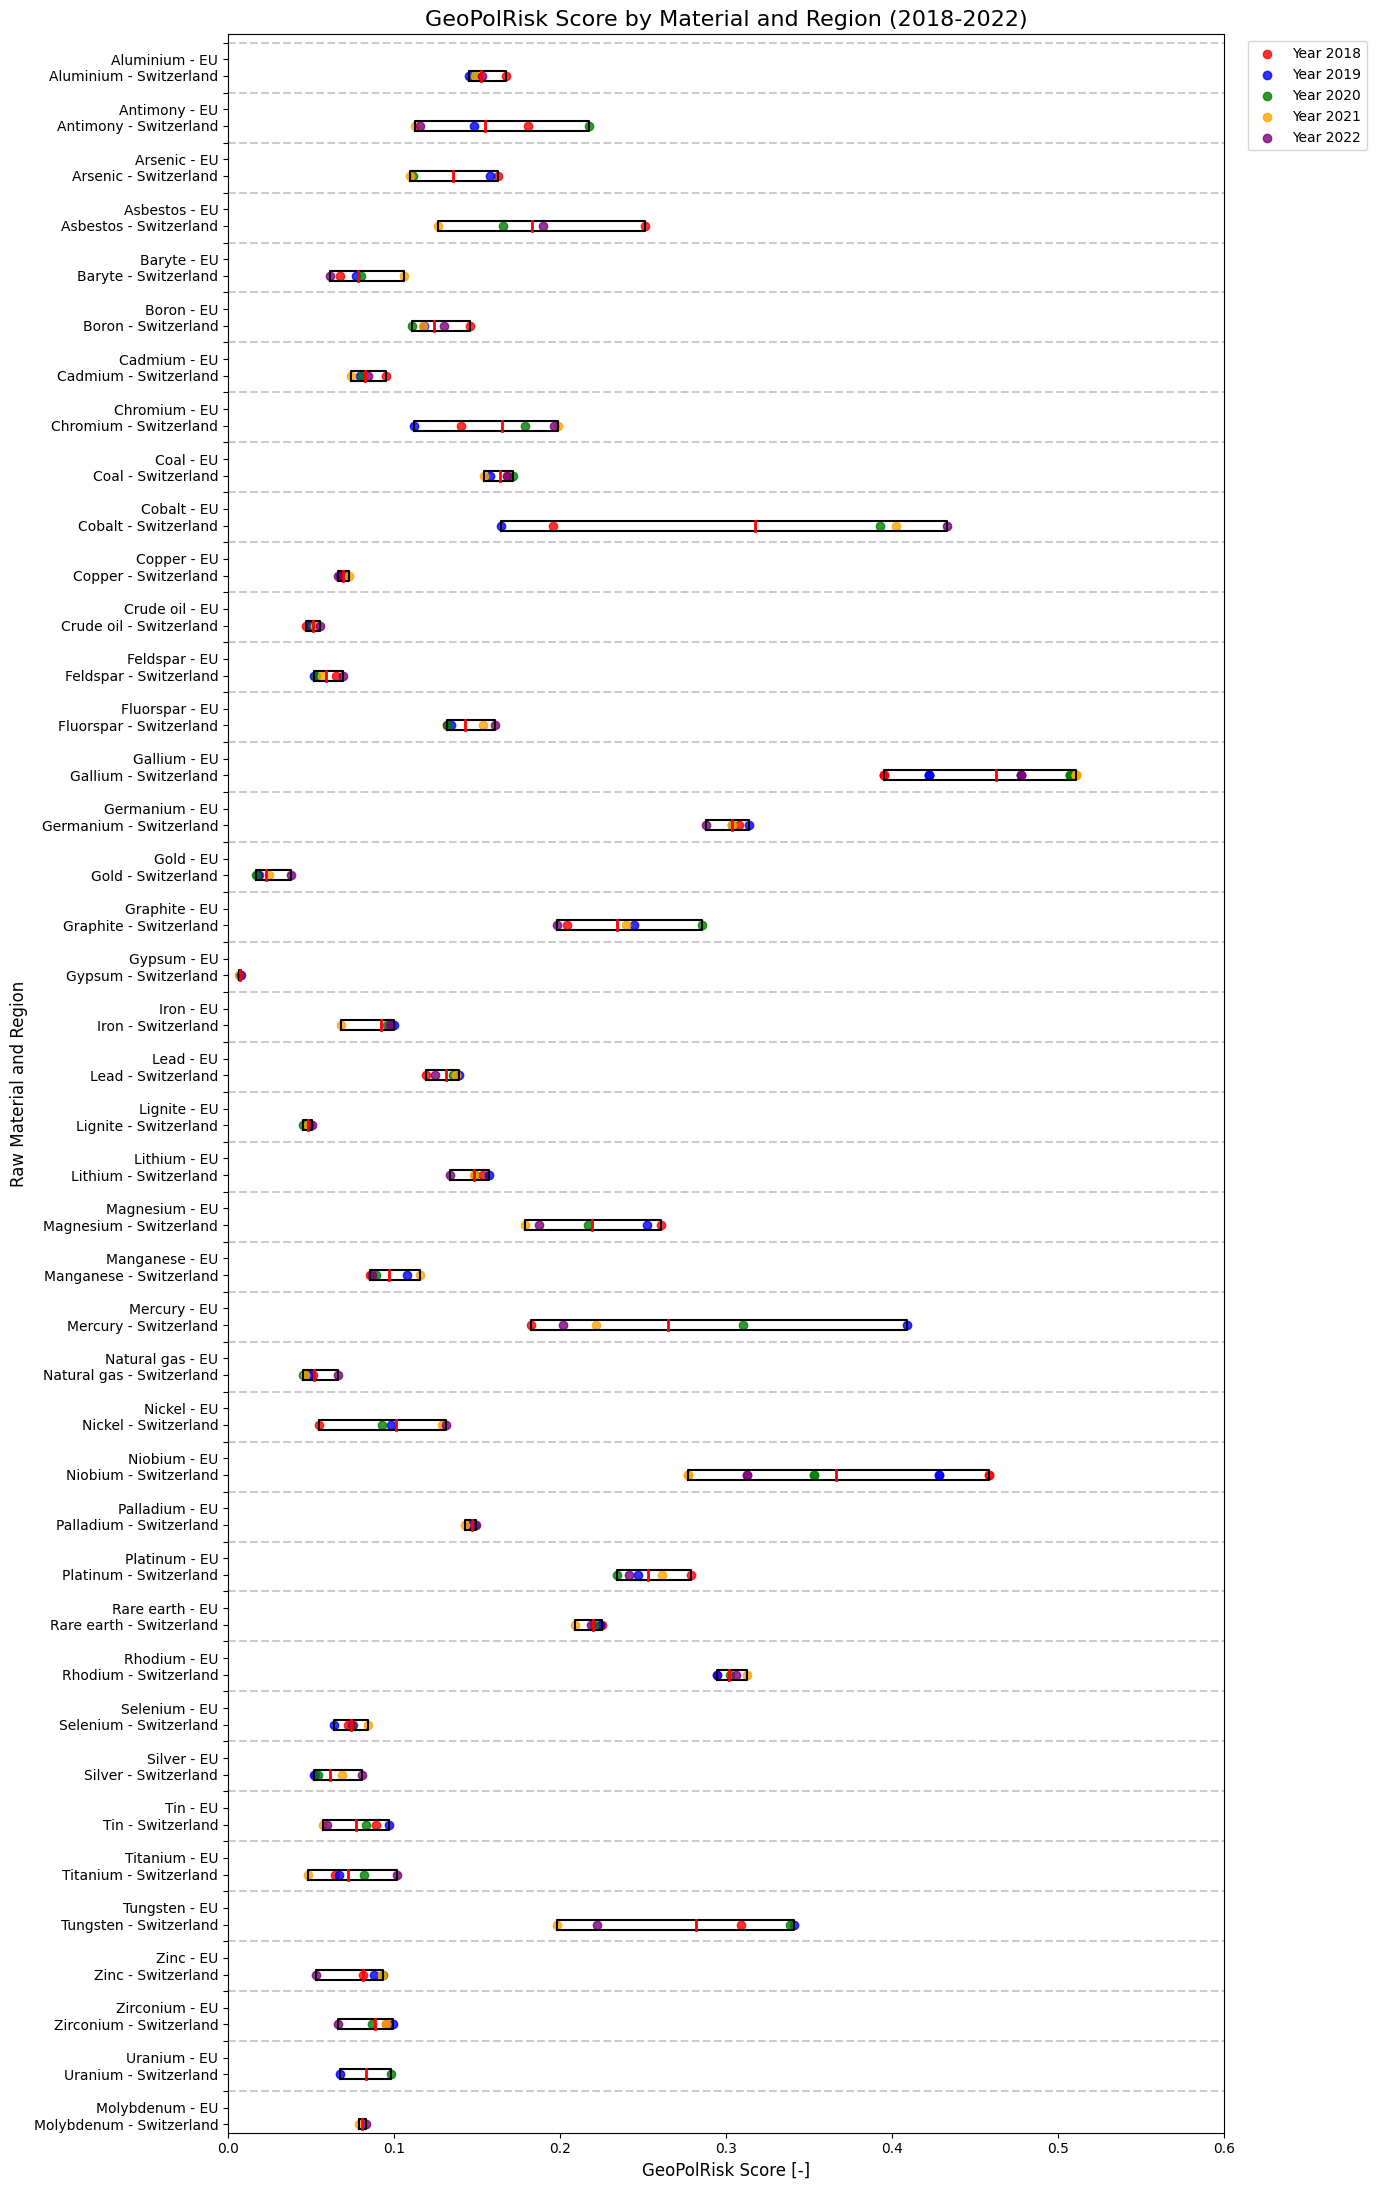

In [10]:
df = df[df["GeoPolRisk Score"] > 0]

# Create a combined Material-Region column
df["Material-Region"] = df["Raw Material"] + " - " + df["Country [Economic Entity]"]

# Define the unique order of materials and regions, leaving spaces between pairs
materials = df["Raw Material"].unique()
regions = ["Switzerland", "EU"]
material_region_order = [
    f"{material} - {region}" for material in materials[::-1] for region in regions
]
# Insert empty strings between each material
material_region_order_with_spaces = []
for material in materials[::-1]:
    material_region_order_with_spaces.extend(
        [f"{material} - Switzerland", f"{material} - EU", ""]
)

# Map material-region pairs to y-axis positions
material_region_positions = {
    name: idx for idx, name in enumerate(material_region_order_with_spaces)
}

# Define distinct colors for the years
distinct_colors = ['red', 'blue', 'green', 'orange', 'purple']
years = sorted(df["Year"].unique())

# Initialize the figure
plt.figure(figsize=(14, 22))

# Plot each material-region pair
for material_region, group in df.groupby("Material-Region"):
    y_position = material_region_positions[material_region]
    group_scores = group["GeoPolRisk Score"]

    # Plot individual data points for each year
    for year, color in zip(years, distinct_colors):
        year_scores = group[group["Year"] == year]["GeoPolRisk Score"]
        plt.scatter(
            year_scores,
            [y_position] * len(year_scores),
            label=f"Year {year}" if y_position == 0 else None,
            color=color,
            alpha=0.8,
        )

    if not group_scores.empty:
        # Min, max, and mean excluding zeros
        x_min, x_max, x_mean = group_scores.min(), group_scores.max(), group_scores.mean()

        # Draw a hollow box representing the range
        plt.plot(
            [x_min, x_min, x_max, x_max, x_min],
            [y_position - 0.3, y_position + 0.3, y_position + 0.3, y_position - 0.3, y_position - 0.3],
            color="black",
            linewidth=1.5,
        )

        # Horizontal line for the mean
        plt.plot(
            [x_mean, x_mean],
            [y_position - 0.3, y_position + 0.3],
            color="red",
            linewidth=2,
        )

# Add vertical lines for separation aligned with empty spaces
for idx, name in enumerate(material_region_order_with_spaces):
    if name == "":
        plt.axhline(y=idx, color="gray", linestyle="--", alpha=0.4)

# Customize the y-axis
plt.yticks(
    ticks=list(range(len(material_region_order_with_spaces))),
    labels=material_region_order_with_spaces,
    fontsize=10,
)
plt.ylim(-0.5, len(material_region_order_with_spaces) - 0.5)  # Align y-axis to data
plt.xlabel("GeoPolRisk Score [-]", fontsize=12)
plt.ylabel("Raw Material and Region", fontsize=12)
plt.title("GeoPolRisk Score by Material and Region (2018-2022)", fontsize=16)
plt.xlim(0, 0.6)  # Set x-axis limits
plt.legend(loc="upper right", fontsize=10, bbox_to_anchor=(1.15, 1))
plt.tight_layout()

# Save the plot
plt.savefig("GeoPolRisk_Score_Vertical_v2.png", dpi=300, bbox_inches="tight")
plt.show()

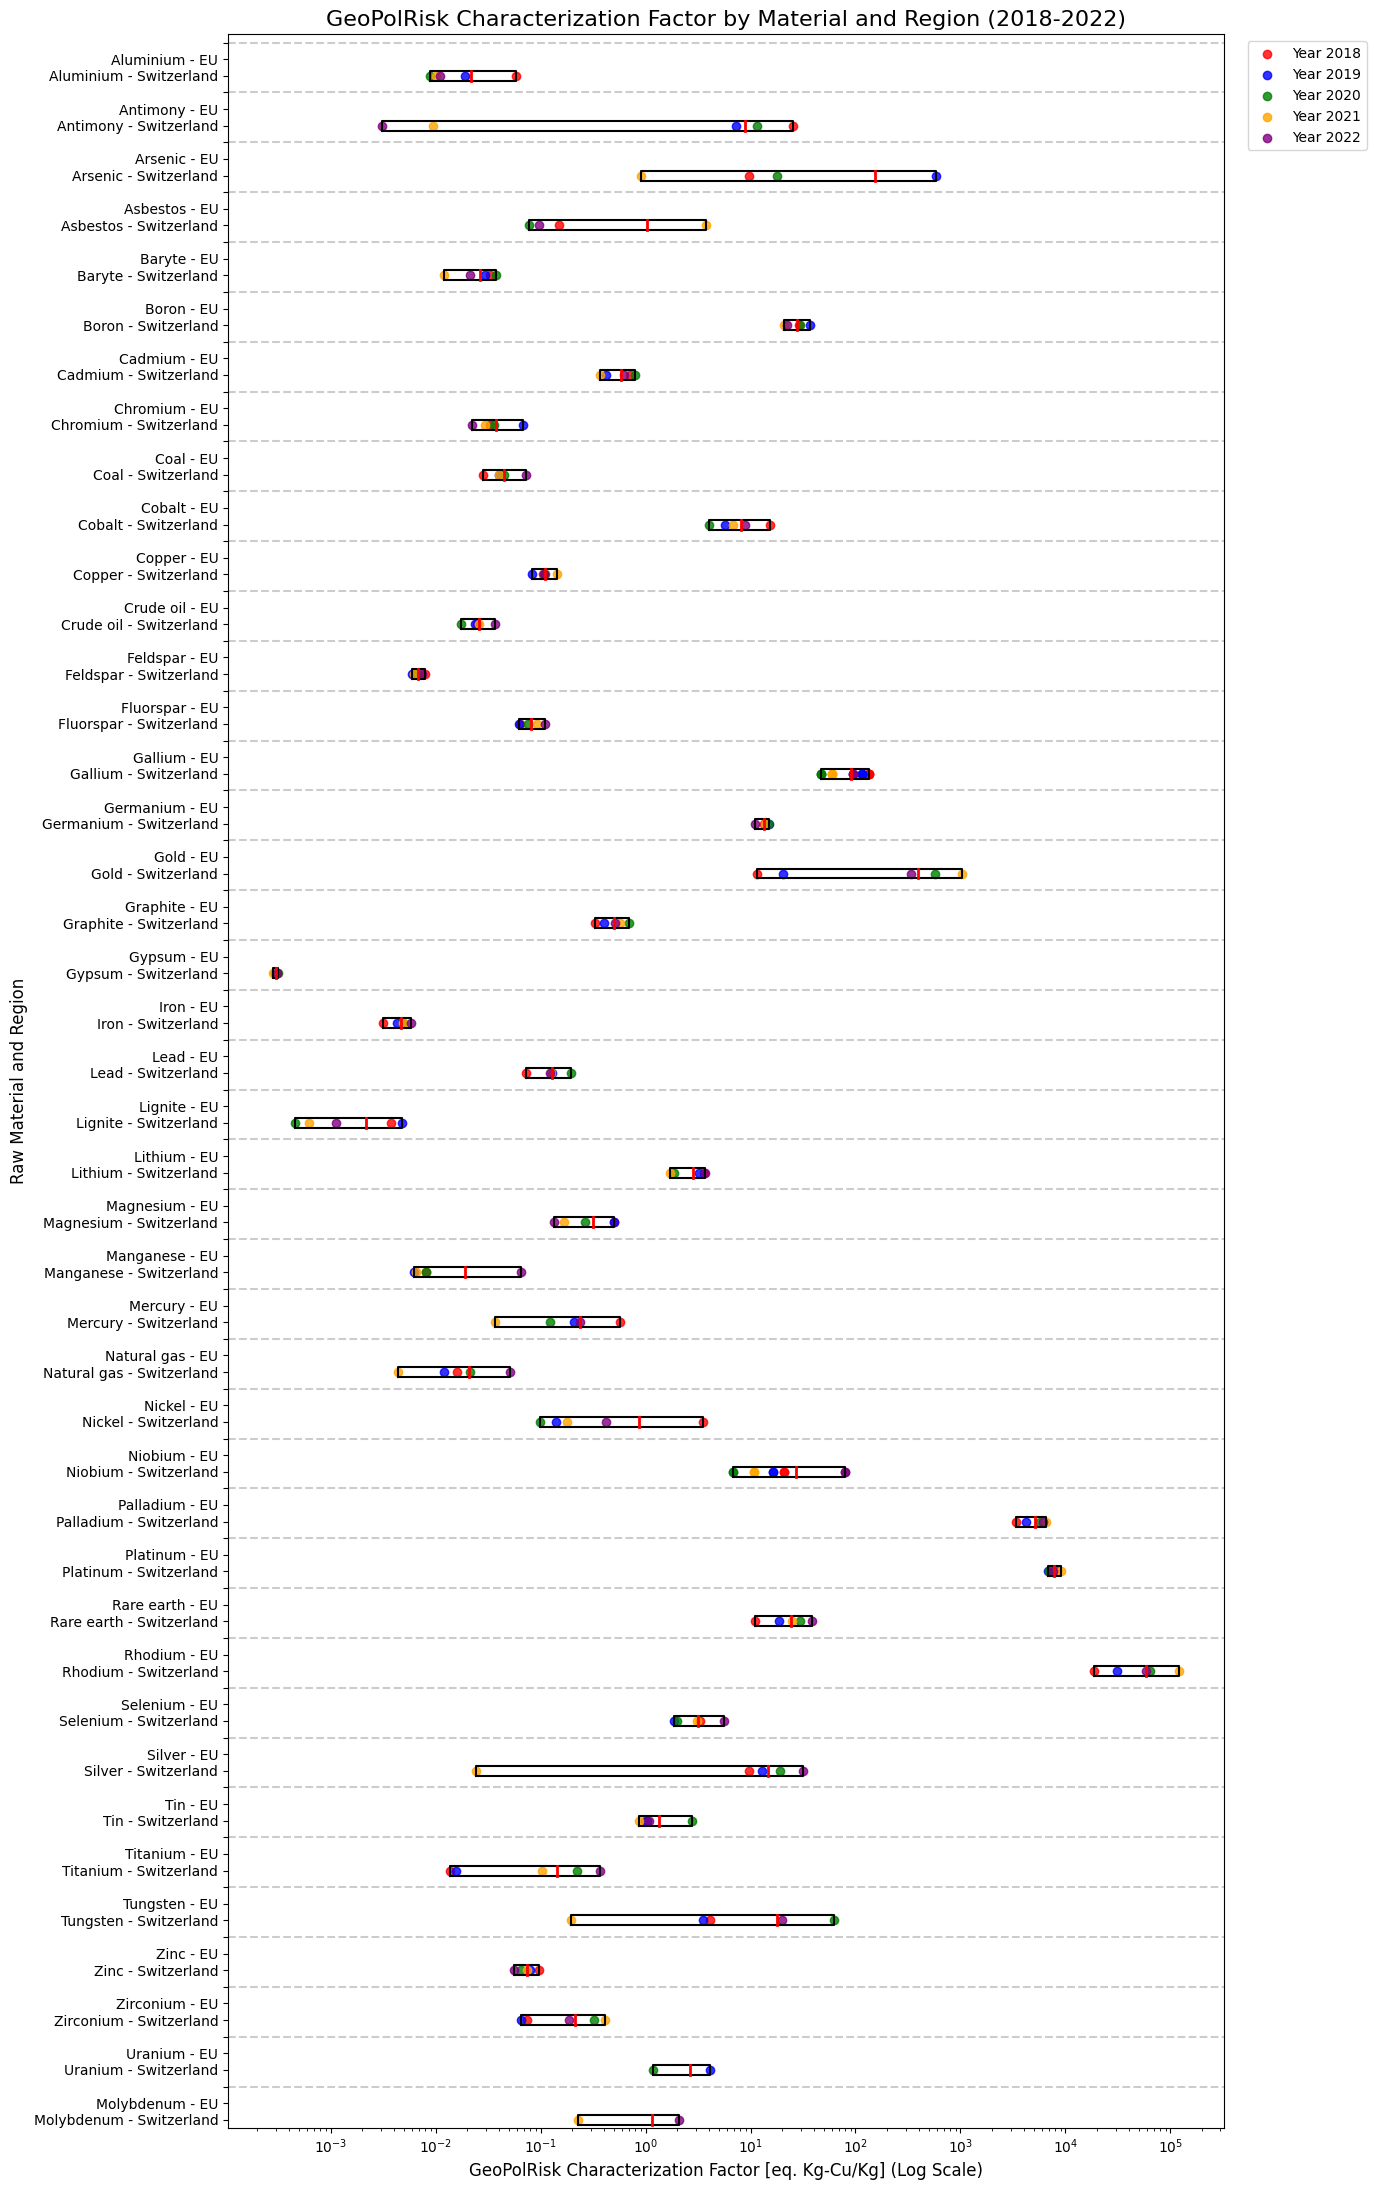

In [11]:
# Filter out zero scores for the Characterization Factor
df = df[df["GeoPolRisk Characterization Factor [eq. Kg-Cu/Kg]"] > 0]

# Create a combined Material-Region column
df["Material-Region"] = df["Raw Material"] + " - " + df["Country [Economic Entity]"]

# Define the unique order of materials and regions, leaving spaces between pairs
materials = df["Raw Material"].unique()
regions = ["Switzerland", "EU"]
material_region_order = [
    f"{material} - {region}" for material in materials[::-1] for region in regions
]
# Insert empty strings between each material
material_region_order_with_spaces = []
for material in materials[::-1]:
    material_region_order_with_spaces.extend(
        [f"{material} - Switzerland", f"{material} - EU", ""]
)

# Map material-region pairs to y-axis positions
material_region_positions = {
    name: idx for idx, name in enumerate(material_region_order_with_spaces)
}

# Define distinct colors for the years
distinct_colors = ['red', 'blue', 'green', 'orange', 'purple']
years = sorted(df["Year"].unique())

# Initialize the figure
plt.figure(figsize=(14, 22))

# Plot each material-region pair
for material_region, group in df.groupby("Material-Region"):
    y_position = material_region_positions[material_region]
    group_scores = group["GeoPolRisk Characterization Factor [eq. Kg-Cu/Kg]"]

    # Plot individual data points for each year
    for year, color in zip(years, distinct_colors):
        year_scores = group[group["Year"] == year]["GeoPolRisk Characterization Factor [eq. Kg-Cu/Kg]"]
        plt.scatter(
            year_scores,
            [y_position] * len(year_scores),
            label=f"Year {year}" if y_position == 0 else None,
            color=color,
            alpha=0.8,
        )

    if not group_scores.empty:
        # Min, max, and mean excluding zeros
        x_min, x_max, x_mean = group_scores.min(), group_scores.max(), group_scores.mean()

        # Draw a hollow box representing the range
        plt.plot(
            [x_min, x_min, x_max, x_max, x_min],
            [y_position - 0.3, y_position + 0.3, y_position + 0.3, y_position - 0.3, y_position - 0.3],
            color="black",
            linewidth=1.5,
        )

        # Horizontal line for the mean
        plt.plot(
            [x_mean, x_mean],
            [y_position - 0.3, y_position + 0.3],
            color="red",
            linewidth=2,
        )

# Add vertical lines for separation aligned with empty spaces
for idx, name in enumerate(material_region_order_with_spaces):
    if name == "":
        plt.axhline(y=idx, color="gray", linestyle="--", alpha=0.4)

# Customize the y-axis
plt.yticks(
    ticks=list(range(len(material_region_order_with_spaces))),
    labels=material_region_order_with_spaces,
    fontsize=10,
)
plt.ylim(-0.5, len(material_region_order_with_spaces) - 0.5)  # Align y-axis to data
plt.xscale("log")  # Set x-axis to log scale (base 10)
plt.xlabel("GeoPolRisk Characterization Factor [eq. Kg-Cu/Kg] (Log Scale)", fontsize=12)
plt.ylabel("Raw Material and Region", fontsize=12)
plt.title("GeoPolRisk Characterization Factor by Material and Region (2018-2022)", fontsize=16)
plt.legend(loc="upper right", fontsize=10, bbox_to_anchor=(1.15, 1))
plt.tight_layout()

# Save the plot
plt.savefig("GeoPolRisk_Characterization_Factor_Vertical_Log_v2.png", dpi=300, bbox_inches="tight")
plt.show()
